# Preprocessing del dataset

## Import delle librerie

In [2]:
from app.features.plotter.frames_plotter import plot_frames
from handcrafted.app.dataset.dataset import Dataset
from handcrafted.app.preprocess.roi_extractor import RoiExtractor
from handcrafted.app.utilities.utils import create_mp4_video_from_frames

import cv2

## Caricamento del dataset originale
Attraverso la classe [Dataset](./handcrafted/app/dataset/dataset.py), vengono caricati, dal file [WLASL_v0.3.json](./data/WLASL_v0.3.json), tutti i video presenti nel dataset. Con il parametro `only_samples` è possibile specificare se caricare tutti i video presenti nella cartella `data/videos` (quelli già preprocessati) o solo un campione (composto da due soli video) presi dal dataset originale, e situati nella cartella `data/original_videos_sample`.

In [3]:
dataset = Dataset("data/WLASL_v0.3.json", only_samples=True)
video1 = dataset.videos[0]
video2 = dataset.videos[1]

## Modifica del parametro `frame_end`
Dato che la maggior parte dei valori di `frame_end` è pari a `-1`, si è preferito modificare questo valore per rispecchiare il numero di frame di cui è composto il video. Per aggiornare il parametro `frame_end` è stato realizzato il metodo `update_videos` nella classe [Dataset](./handcrafted/app/dataset/dataset.py), il cui unico compito è aggiornare il file json `data/WLASL_v0.3.json` con i nuovi valori.

In [4]:
dataset.update_videos()

## Visualizzazione dei video originali
Il metodo `plot_frames` permette di visualizzare i frame di un video.

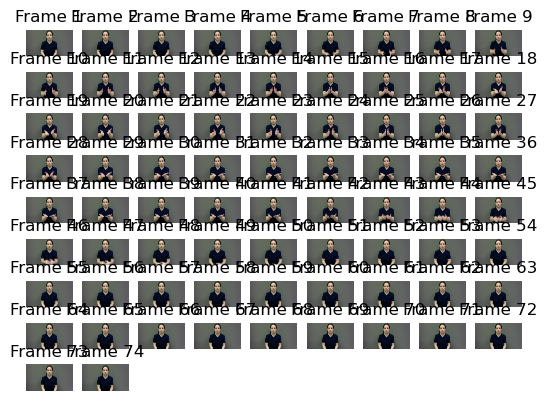

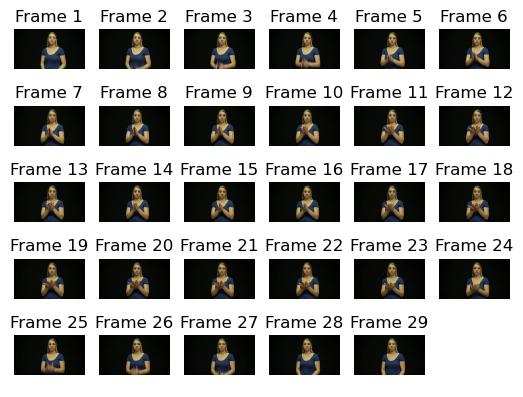

In [5]:
plot_frames(video1.get_frames())
plot_frames(video2.get_frames())

## Estrazione della ROI
Verrà estratta la Region of Interest per entrambi i video. Il video viene poi ridimensionato a 224x224 aggiungendo padding se necessario.
Per svolgere questo compito è stata realizzata la classe [RoiExtractor](handcrafted/app/preprocess/roi_extractor.py).

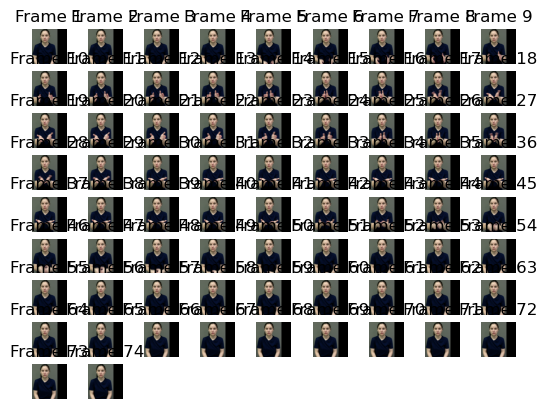

In [6]:
video1_roi_extractor = RoiExtractor(
    frames=video1.get_frames(), bbox=video1.bbox, resize=224
)
video1_frames = video1_roi_extractor.extract(False)
plot_frames(video1_frames)

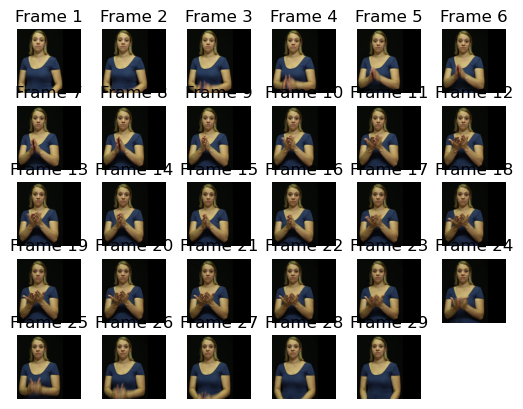

In [7]:
video2_roi_extractor = RoiExtractor(
    frames=video2.get_frames(), bbox=video2.bbox, resize=224
)
video2_frames = video2_roi_extractor.extract(False)
plot_frames(video2_frames)

## Salvataggio dei video processati
Vengono quindi salvati i video, utilizzando ffmpeg, nella cartella `data/original_videos_sample/updated`.

In [8]:
frames_bgr = [
    cv2.cvtColor(frame, cv2.COLOR_RGB2BGR) for frame in video1_frames
]
create_mp4_video_from_frames(
    frames_bgr,
    video1.fps,
    f"data/original_videos_sample/updated/{video1.video_id}.mp4",
)

ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 14.2.1 (GCC) 20241116
  configuration: --disable-static --prefix=/nix/store/eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee-ffmpeg-7.1 --target_os=linux --arch=x86_64 --pkg-config=pkg-config --enable-gpl --enable-version3 --disable-nonfree --disable-static --enable-shared --enable-pic --disable-thumb --disable-small --enable-runtime-cpudetect --disable-gray --enable-swscale-alpha --enable-hardcoded-tables --enable-safe-bitstream-reader --enable-pthreads --disable-w32threads --disable-os2threads --enable-network --enable-pixelutils --datadir=/nix/store/cznxr6qhhkh5dwypsh3vrvxmyj3h88c1-ffmpeg-7.1-data/share/ffmpeg --enable-ffmpeg --enable-ffplay --enable-ffprobe --bindir=/nix/store/eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee-ffmpeg-7.1-bin/bin --enable-avcodec --enable-avdevice --enable-avfilter --enable-avformat --enable-avutil --enable-postproc --enable-swresample --enable-swscale --libdir=/nix/store/eeeeeeeeeeeeeeeeeeeeeeeeeeeeee

'82800a5b-9e9e-41ec-8769-ee67e5d65525.mp4'

In [9]:
frames_bgr = [
    cv2.cvtColor(frame, cv2.COLOR_RGB2BGR) for frame in video2_frames
]
create_mp4_video_from_frames(
    frames_bgr,
    video2.fps,
    f"data/original_videos_sample/updated/{video2.video_id}.mp4",
)

ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 14.2.1 (GCC) 20241116
  configuration: --disable-static --prefix=/nix/store/eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee-ffmpeg-7.1 --target_os=linux --arch=x86_64 --pkg-config=pkg-config --enable-gpl --enable-version3 --disable-nonfree --disable-static --enable-shared --enable-pic --disable-thumb --disable-small --enable-runtime-cpudetect --disable-gray --enable-swscale-alpha --enable-hardcoded-tables --enable-safe-bitstream-reader --enable-pthreads --disable-w32threads --disable-os2threads --enable-network --enable-pixelutils --datadir=/nix/store/cznxr6qhhkh5dwypsh3vrvxmyj3h88c1-ffmpeg-7.1-data/share/ffmpeg --enable-ffmpeg --enable-ffplay --enable-ffprobe --bindir=/nix/store/eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee-ffmpeg-7.1-bin/bin --enable-avcodec --enable-avdevice --enable-avfilter --enable-avformat --enable-avutil --enable-postproc --enable-swresample --enable-swscale --libdir=/nix/store/eeeeeeeeeeeeeeeeeeeeeeeeeeeeee

'5f06ccd0-5037-45b8-afd4-b041b7565ff1.mp4'